**Bu ödevde, veri seti üzerinde detaylı bir inceleme yapmanız bekleniyor.
Öncelikle verilen veri setini dikkatle inceleyerek columnların ne ifade ettiğini kendi ifadeleriniz ile açıklayın. 
Veri setleri her zaman detaylı açıklamalar ile gelmeyebilir, bu durumlarda sorumluluk almalı ve veriyi yorumlama becerisine sahip olmalısınız.
Bu nedenle description kısmı boş olarak gelen feature'lar için de tahminde bulunmanızı bekliyorum.**

Örneğin: 
    
- age(integer) -> tabloda yer alan kişilerin yaş bilgisi
- workclass(..) -> ...


Veri bu notebook üzerinde import edilmiş halde bulunuyor. csv dosyasını DataFrame içerisine okuduktan sonra üzerinde gerekli gördüğünüz çalışmaları yapabilirsiniz. 

Aşağıdaki sorulara cevap bulmanızı bekliyorum. 

> İncelemek için, Data Source : [Here](https://archive.ics.uci.edu/dataset/2/adult)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/adult-data/adult.data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


> ----------------------------------------------------------------------------------------------------------------

## Beginner Level Questions

**Veri kümesinde kaç birey bulunmaktadır?**

In [3]:
df.shape[0]

32561

**Bireylerin yaş dağılımı nedir?**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


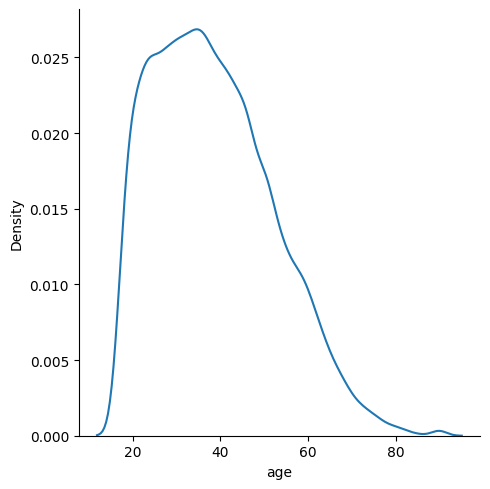

In [4]:
import seaborn as sns

sns.displot(df['age'] , kind= 'kde')

**Hangi çalışma sınıfında en fazla birey bulunmaktadır?**

In [5]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

**50K'nın üzerinde maaş alan kaç birey vardır?**

In [6]:
df['salary'].value_counts()['>50K']

7841

**50K'nın üzerinde ve altında maaş alan bireylerin ortalama yaşı nedir?**

In [7]:
ust50 = df[df['salary']== '>50K']
alt50 = df[df['salary']== '<=50K']
print('50k dan fazla kazananların yaş ortalaması:', ust50['age'].mean())
print('50k dan az kazananların yaş ortalaması:', alt50['age'].mean())

50k dan fazla kazananların yaş ortalaması: 44.24984058155847
50k dan az kazananların yaş ortalaması: 36.78373786407767


**Bireyler tarafından elde edilen en yaygın eğitim seviyesi nedir?**

In [8]:
df['education'].value_counts().index[0]

'HS-grad'

**Haftada 40 saatten fazla çalışan kaç birey vardır?**

In [9]:
# len(df[df['hours-per-week'] > 40])

df[df['hours-per-week'] > 40].shape[0]

9581

**Her cinsiyetten kaç birey bulunmaktadır?**

In [10]:
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

**Kadınların yaş ortalaması nedir?**

In [11]:
df[df['sex'] == 'Female']['age'].mean()

36.85823043357163

**Alman vatandaşlarının yüzdesi nedir?**

In [12]:
df['native-country'].value_counts()['Germany'] / df.shape[0]

0.004207487485028101

**Yıllık 50 binden fazla kazanan insanların yaşlarının ortalaması ve standart sapması nedir?**

In [13]:
print(df[df['salary'] == '>50K']['age'].mean())
df[df['salary'] == '>50K']['age'].std()

44.24984058155847


10.519027719851826

**50 binden fazla kazananlar en az lise eğitimi almıştır diyebilir miyiz?**
> (education feature seti içerisinde Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters ve Doctorate özelliğine sahip olanlar)

Hayır, çünkü 50binden fazla kazanan lise ve ortaokul mezunu insanlar da var.

In [14]:
ust50['education'].value_counts(normalize = True) # %94 civarı inanılmaz eğitimli

education
Bachelors       0.283255
HS-grad         0.213621
Some-college    0.176891
Masters         0.122306
Prof-school     0.053947
Assoc-voc       0.046040
Doctorate       0.039026
Assoc-acdm      0.033797
10th            0.007907
11th            0.007652
7th-8th         0.005101
12th            0.004209
9th             0.003443
5th-6th         0.002041
1st-4th         0.000765
Name: proportion, dtype: float64

**Amer-Indian-Eskimo ırkındaki erkeklerin maksimum yaşını bulun.**

In [15]:
df[(df['race'] == 'Amer-Indian-Eskimo') & (df['sex'] == 'Male')]['age'].max()

82

**50 binden fazla kazanan erkeklerin evli/bekar olma oranı nedir?**
> Married ifadesi ile başlayan feature'ları evli, kalanları ise bekar olarak kabul edin.



In [16]:
ust50erkek = ust50[ust50['sex'] == 'Male']
ust50erkek

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [17]:
ust50erkek['marital-status'].unique()

array(['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [18]:
ust50erkek['marital-status'].value_counts()

marital-status
Married-civ-spouse       5938
Never-married             325
Divorced                  284
Separated                  49
Widowed                    39
Married-spouse-absent      23
Married-AF-spouse           4
Name: count, dtype: int64

In [19]:
ust50erkek[ust50erkek['marital-status'].isin(['Married-civ-spouse' , 'Married-spouse-absent' , 'Married-AF-spouse' ])].shape[0] # Evlilerin sayısı

ust50erkek[ust50erkek['marital-status'].isin(['Never-married' , 'Divorced' , 'Separated' , 'Widowed' ])].shape[0] # Bekarların sayısı

ust50erkek[ust50erkek['marital-status'].isin(['Married-civ-spouse' , 'Married-spouse-absent' , 'Married-AF-spouse' ])].shape[0] / ust50erkek[ust50erkek['marital-status'].isin(['Never-married' , 'Divorced' , 'Separated' , 'Widowed' ])].shape[0]

8.558106169296988

**Bir kişinin haftada maksimum kaç saat çalıştığını bulun. Kaç kişi bu kadar saat çalışıyor ve bunlar arasında çok kazananların oranı nedir?**

In [20]:
df['hours-per-week'].max()

99

In [21]:
df[df['hours-per-week'] == df['hours-per-week'].max()].shape[0]

85

In [22]:
cokcalisan = df[df['hours-per-week'] == df['hours-per-week'].max()]
cokcalisan

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1172,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
1887,55,Self-emp-not-inc,184425,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
3578,37,Self-emp-inc,382802,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,>50K
4086,50,?,174964,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992,40,Self-emp-inc,104235,Masters,14,Never-married,Other-service,Own-child,White,Male,0,0,99,United-States,<=50K
31681,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
31699,43,Self-emp-not-inc,163108,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K


In [23]:
cokcalisan['salary'].value_counts(normalize= True)

salary
<=50K    0.705882
>50K     0.294118
Name: proportion, dtype: float64

**Her ülke için az ve çok kazananların ortalama çalışma süresini hesaplayın.** (crosstab kullanabilirsiniz)

In [24]:
df.groupby(['native-country' , 'salary'])['hours-per-week'].mean()

native-country  salary
?               <=50K     40.164760
                >50K      45.547945
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: hours-per-week, Length: 82, dtype: float64

## Intermediate Level Questions

**Farklı çalışma sınıfı(workclass) kategorileri arasında eğitim yılı (education-num) ortalaması nedir?**

In [25]:
df.groupby(['workclass'])['education-num'].mean()

workclass
?                    9.260349
Federal-gov         10.973958
Local-gov           11.042045
Never-worked         7.428571
Private              9.879714
Self-emp-inc        11.137097
Self-emp-not-inc    10.226289
State-gov           11.375963
Without-pay          9.071429
Name: education-num, dtype: float64

**Hangi meslek en yüksek ortalama maaşa sahiptir?**

In [26]:
df.groupby(['occupation'])['salary'].value_counts(normalize=True).loc[:, ">50K"].idxmax()


'Exec-managerial'

**Cinsiyete göre haftalık çalışma saatleri arasında önemli farklar var mı?**

In [27]:
print(df.groupby(['sex'])['hours-per-week'].mean())
print('Male works 6 more hours than female on average')

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64
Male works 6 more hours than female on average


**Maaşları 50K'nın üzerinde ve altında olanlar için medeni durum dağılımı nasıl değişiyor?**

In [28]:
print(df.groupby(['salary'])['marital-status'].value_counts(normalize=True))
print('we see that married ones tend to make more than 50K')

salary  marital-status       
<=50K   Never-married            0.412298
        Married-civ-spouse       0.335113
        Divorced                 0.161003
        Separated                0.038794
        Widowed                  0.036731
        Married-spouse-absent    0.015534
        Married-AF-spouse        0.000526
>50K    Married-civ-spouse       0.853463
        Never-married            0.062620
        Divorced                 0.059049
        Widowed                  0.010840
        Separated                0.008417
        Married-spouse-absent    0.004336
        Married-AF-spouse        0.001275
Name: proportion, dtype: float64
we see that married ones tend to make more than 50K


**Her ilişki türü için ortalama yaş nedir?**

In [29]:
 df.groupby(["relationship"])["age"].mean()

relationship
Husband           43.818616
Not-in-family     38.346057
Other-relative    33.164118
Own-child         24.827940
Unmarried         40.293964
Wife              39.846301
Name: age, dtype: float64

**Hangi ülkede en yüksek ortalama sermaye kazancı(capital gain) vardır?**

In [30]:
 df.groupby(["native-country"])["capital-gain"].mean().idxmax()

'India'

**Doktora seviyesinde eğitime sahip bireyler arasında ırk dağılımı nasıl değişir?**

In [31]:
df[df["education"]=='Doctorate']["race"].value_counts()

race
White                 369
Asian-Pac-Islander     28
Black                  11
Amer-Indian-Eskimo      3
Other                   2
Name: count, dtype: int64

**Asla çalışmamış (workclass: Never-worked) bireylerin farklı eğitim seviyeleri arasındaki oranı nedir?**

In [32]:
df[(df['workclass'] == 'Never-worked')]['education'].value_counts(normalize=True)

education
10th            0.285714
Some-college    0.285714
7th-8th         0.142857
11th            0.142857
HS-grad         0.142857
Name: proportion, dtype: float64

## Upper-intermediate Level Questions

**Erkekler ve kadınlar arasında sermaye kazancı ve sermaye kaybı ortalamasını karşılaştırın.**

In [33]:
df.groupby(["sex"])[["capital-gain", "capital-loss"]].mean()

,capital-gain,capital-loss
sex,,
Female,568.410547,61.187633
Male,1329.370078,100.213309


**Her ırk için yaş dağılımı nedir?**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


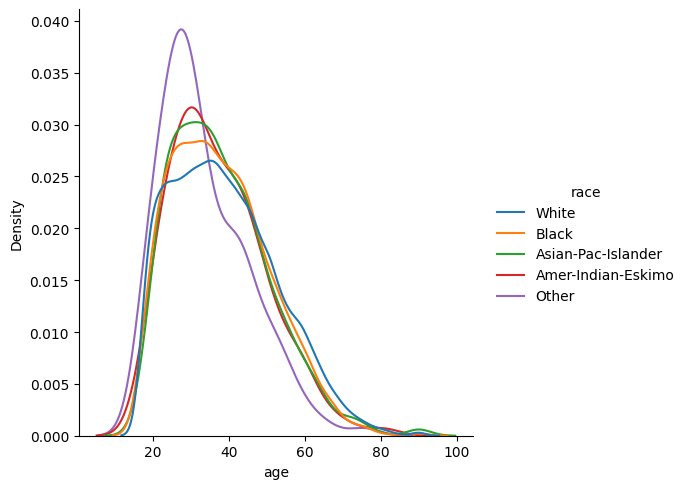

In [34]:
sns.displot(df, x="age", hue="race", kind="kde", common_norm=False)

**Eğitim seviyelerine göre çalışma saatlerinin dağılımı nasıldır?**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


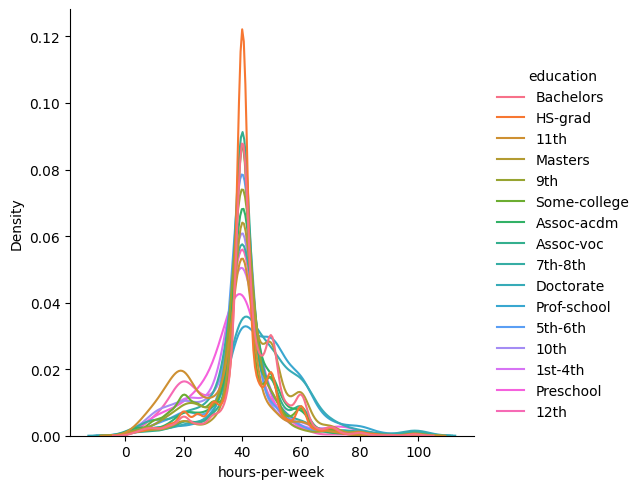

In [35]:
sns.displot(df, x="hours-per-week", hue="education", kind="kde", common_norm=False)

In [36]:
df.groupby(["education"])["hours-per-week"].mean()

education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

**Her medeni durum için en yaygın meslek nedir?**

In [37]:
df.groupby("marital-status")["occupation"].agg(lambda x: x.mode().iat[0])

marital-status
Divorced                  Adm-clerical
Married-AF-spouse         Adm-clerical
Married-civ-spouse        Craft-repair
Married-spouse-absent     Adm-clerical
Never-married            Other-service
Separated                Other-service
Widowed                  Other-service
Name: occupation, dtype: object

**50K'nın altında maaş alanlar arasında en yaygın ilişki durumu nedir?**

In [38]:
df[df['salary']=='<=50K']['relationship'].value_counts().idxmax()

'Not-in-family'

**Hangi ülke, workclass = Self-emp-inc olarak en yüksek orana sahiptir?**

In [39]:
df[(df['workclass'] == 'Self-emp-inc')]['native-country'].value_counts(normalize=True).idxmax()

'United-States'

**Yönetici(Exec-managerial) rolündeki bireyler daha yüksek sermaye kazançlarına sahip olma olasılığında daha mıdır?**

In [40]:
df.groupby(df['occupation'])['capital-gain'].mean().sort_values(ascending=False)

occupation
Prof-specialty       2726.699517
Exec-managerial      2262.772996
Sales                1319.829315
Protective-serv       708.098613
Tech-support          673.552802
Craft-repair          649.512808
?                     604.491047
Farming-fishing       589.726358
Adm-clerical          495.954907
Transport-moving      490.323732
Machine-op-inspct     328.689311
Priv-house-serv       279.852349
Handlers-cleaners     257.572993
Other-service         191.301669
Armed-Forces            0.000000
Name: capital-gain, dtype: float64

In [41]:
print('Bu roldeki bireyler daha yüksek sermaye kazançlarına sahiptir: ',df.groupby(df['occupation'])['capital-gain'].mean().idxmax())

Bu roldeki bireyler daha yüksek sermaye kazançlarına sahiptir:  Prof-specialty
